In [163]:
import pandas as pd 
import os

### Load Raw  Dataset

In [164]:
#Customer
df_customer = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_customers_dataset.csv")

#Geolocation
df_geolocation = pd.read_csv(r"F:\Portofolio\Warehousing\data\\raw\olist_geolocation_dataset.csv")

#Order Items
df_order_items = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_order_items_dataset.csv")

#Order Payment
df_order_payment = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_order_payments_dataset.csv")

#Order Review
df_order_review = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_order_reviews_dataset.csv")

#Order Delivery
df_order_delivery = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_orders_dataset.csv")

#Product
df_product = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_products_dataset.csv")

#Address
df_address = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\olist_sellers_dataset.csv")

#Category
df_category = pd.read_csv(r"F:\Portofolio\Warehousing\data\raw\product_category_name_translation.csv")


### Data Preparation Stage

#### Customer

In [165]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [166]:
df_customer.count()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

In [167]:
df_customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [168]:
df_customer.duplicated().sum()

0

In [169]:
for col in ["customer_city", "customer_state"]:
    print(col, ":", df_customer[col].unique())

customer_city : ['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
customer_state : ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


In [170]:
df_customer.to_csv("../data/processed/customer_cleaned.csv", index=False)

#### Geolocation

In [171]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [172]:
df_geolocation.count()

geolocation_zip_code_prefix    1000163
geolocation_lat                1000163
geolocation_lng                1000163
geolocation_city               1000163
geolocation_state              1000163
dtype: int64

In [173]:
for col in ["geolocation_city", "geolocation_state"]:
    print(col, ":", df_geolocation[col].unique())

geolocation_city : ['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']
geolocation_state : ['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']


In [174]:
df_geolocation.to_csv("../data/processed/geolocation_cleaned.csv", index=False)

#### Order Items

In [175]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [176]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [177]:
# Switching Dtype for shipping_limit_date column

df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date']).dt.date

In [178]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14


In [179]:
df_order_items.count()

order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64

In [180]:
df_order_items[["price", "freight_value"]].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [181]:
df_order_items[["price", "freight_value"]].corr()

,price,freight_value
price,1.000000,0.414204
freight_value,0.414204,1.000000


In [182]:
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [183]:
df_order_items.to_csv("../data/processed/order_items_cleaned.csv", index=False)

#### Order Payment

In [184]:
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [185]:
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [186]:
df_order_payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [187]:
df_order_payment.duplicated().sum()

0

In [188]:
for col in ["payment_type"]:
    print(col, ":", df_order_payment[col].unique())

payment_type : ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [189]:
df_order_payment[["payment_installments", "payment_value"]].describe()

,payment_installments,payment_value
count,103886.000000,103886.000000
mean,2.853349,154.100380
std,2.687051,217.494064
min,0.000000,0.000000
25%,1.000000,56.790000
50%,1.000000,100.000000
75%,4.000000,171.837500
max,24.000000,13664.080000


In [190]:
df_order_payment.to_csv("../data/processed/order_payment_cleaned.csv", index=False)

#### Order Review

In [191]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [192]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [193]:
# Changing Dtype for review_creation_date column to date format

df_order_review['review_creation_date'] = pd.to_datetime(df_order_review['review_creation_date']).dt.date

In [194]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [195]:
df_order_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [196]:
df_order_review.count()

review_id                  99224
order_id                   99224
review_score               99224
review_comment_title       11568
review_comment_message     40977
review_creation_date       99224
review_answer_timestamp    99224
dtype: int64

In [197]:
df_order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [198]:
# Filling NULL Data With Unknown
df_order_review["review_comment_title"] = df_order_review["review_comment_title"].fillna("Unknown")

df_order_review["review_comment_message"] = df_order_review["review_comment_message"].fillna("Unknown")


In [199]:
df_order_review.duplicated().sum()

0

In [200]:
df_order_review.to_csv("../data/processed/order_review_cleaned.csv", index=False)

#### Order Delivery

In [201]:
df_order_delivery

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [202]:
df_order_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [203]:
### Changing Dtype For Every Order Purchase Timestamp until Order Est Delivery Date
df_order_delivery['order_purchase_timestamp'] = pd.to_datetime(df_order_delivery['order_purchase_timestamp']).dt.date
df_order_delivery['order_approved_at'] = pd.to_datetime(df_order_delivery['order_approved_at']).dt.date
df_order_delivery['order_delivered_carrier_date'] = pd.to_datetime(df_order_delivery['order_delivered_carrier_date']).dt.date
df_order_delivery['order_delivered_customer_date'] = pd.to_datetime(df_order_delivery['order_delivered_customer_date']).dt.date
df_order_delivery['order_estimated_delivery_date'] = pd.to_datetime(df_order_delivery['order_estimated_delivery_date']).dt.date

In [204]:
df_order_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [205]:
df_order_delivery.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


In [206]:
df_order_delivery.duplicated().sum()

0

In [207]:
df_order_delivery.count()

order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
dtype: int64

In [208]:
df_order_delivery.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [209]:
# Filling Missing Value

df_order_delivery["order_approved_at"] = df_order_delivery["order_approved_at"].fillna("Unknown")

df_order_delivery["order_delivered_carrier_date"] = df_order_delivery["order_delivered_carrier_date"].fillna("Unknown")

df_order_delivery["order_delivered_customer_date"] = df_order_delivery["order_delivered_customer_date"].fillna("Unknown")


In [210]:
df_order_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [211]:
df_order_delivery.to_csv("../data/processed/order_delivery_cleaned.csv", index=False)

#### Products

In [212]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [213]:
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Recording by dataset source :

1. product_name_length : number of characters extracted from the product name.

2. product_description_length : number of characters extracted from the product description.

3. product_photos_qty : number of product published photos.

there 3 attribute is refer for product description component, so that we can said that is not very important

4. product length measured in centimeters.

5. product height measured in centimeters.

6. product width measured in centimeters.

In [214]:
df_product = df_product.drop(
    ["product_name_length", "product_description_lenght", "product_photos_qty", "product_name_lenght"],
    axis='columns',
    errors='ignore'
)

In [215]:
df_product.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [216]:
df_product.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [217]:
df_product.isna().sum()

product_id                 0
product_category_name    610
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [218]:
#Filling The Missing Value

df_product["product_category_name"] = df_product["product_category_name"].fillna("Unknown")

In [219]:
df_product.duplicated().sum()

0

In [220]:
#Filling The Missing Value By Length, Height, and Width

print("Weight Skewness", df_product["product_weight_g"].skew())
print("Length Skewness", df_product["product_length_cm"].skew())
print("Width Skewness", df_product["product_width_cm"].skew())

Weight Skewness 3.604859782275307
Length Skewness 1.7504597083360067
Width Skewness 1.6709713361516598


In [221]:
df_product.fillna({col: df_product[col].median() 
                    for col in ['product_weight_g', 'product_length_cm',
                    'product_height_cm', 'product_width_cm']}, inplace=True)


In [222]:
df_product.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [223]:
df_product.count()

product_id               32951
product_category_name    32951
product_weight_g         32951
product_length_cm        32951
product_height_cm        32951
product_width_cm         32951
dtype: int64

In [224]:
df_product.to_csv("../data/processed/product_cleaned.csv", index=False)

#### Address

In [225]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [226]:
for col in ["seller_city", "seller_state"]:
    print(col, ":", df_address[col].unique())

seller_city : ['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo antonio da patrulha'
 'ponta grossa' 'santana de parnaiba' 'sao carlos' 'ibitinga' 'barueri'
 'caxias do sul' 'araguari' 'contagem' 'jaragua do sul' 'lages - sc'
 'bento goncalves' 'catanduva' 'ribeirao pires' 'jaboticabal' 'echapora'
 'cotia' 'rio do sul' 'sorocaba' 'pradopolis' 'itaborai' 'mirassol'
 'birigui' 'assis' 'jaguariuna' 'araraquara' 'macae' 'rio claro'
 'londrina' 'ribeirao preto' 'tres coracoes' 'nhandeara' 'orleans'
 'cuiaba' 'formosa 

In [227]:
df_address.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [228]:
df_address.duplicated().sum()

0

In [229]:
df_address.to_csv("../data/processed/address_cleaned.csv", index=False)

#### Category

In [230]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [231]:
df_category.duplicated().sum()

0

In [232]:
df_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [233]:
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [234]:
df_category.to_csv("../data/processed/category_cleaned.csv", index=False)

### Explanatory

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='seller_city'>

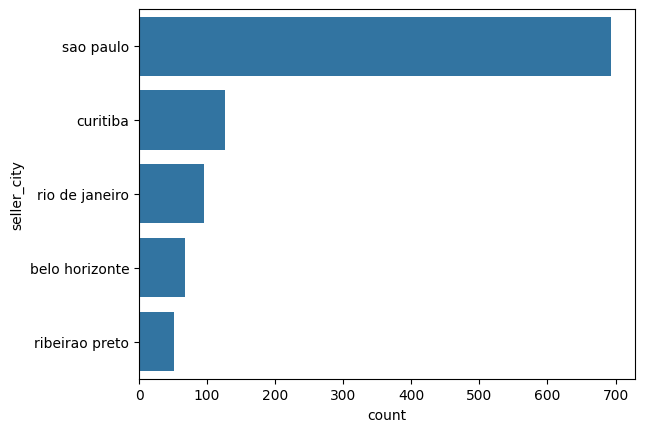

In [236]:
# Top 5 Seller From

# Declare df
df_seller_address = pd.read_csv(r"F:\Portofolio\Warehousing\data\processed\address_cleaned.csv")

#Plot
sns.countplot(y='seller_city', data=df_seller_address, order=df_seller_address['seller_city'].value_counts().index[:5])

Text(0.5, 1.0, 'Persentase Payment Method')

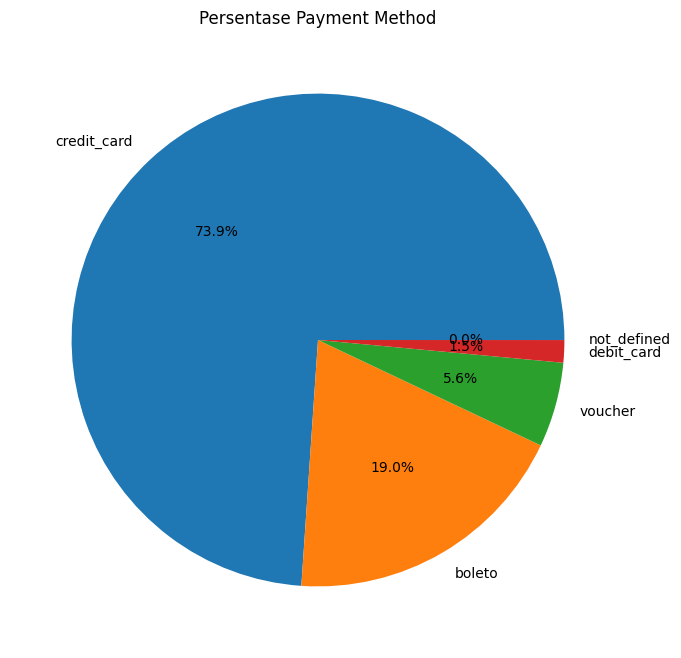

In [237]:
# Payment Method

# Declare Data
df_order_payment_clean = pd.read_csv(r"F:\Portofolio\Warehousing\data\processed\order_payment_cleaned.csv")

# Counting

payment_count = df_order_payment_clean['payment_type'].value_counts()
plt.figure(figsize=(11,8))
plt.pie(payment_count, labels=payment_count.index, autopct='%1.1f%%')
plt.title("Persentase Payment Method")
